## Degue vs Environmental Analysis.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check version
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.2.5
numpy version: 1.20.2
seaborn version: 0.11.1
sklearn version: 0.24.2


### Input Data from CSV file.

In [3]:
# Read in Data set
df= pd.read_csv('../../Nattawat/dengue_preprocessing.csv',header= 0,encoding= 'unicode_escape')

In [4]:
# Tempolary data preparation and just use for build model 

In [5]:
df = df.drop(columns=['province', 'year'])

In [6]:
df = df.loc[df['year_num'] == 1]
df

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
0,1,1,137,1976.0,81.9,37.5,18.4,27.2,4,0.23,1714
1,1,2,113,1907.6,73.6,39.8,19.2,29.2,3,0.05,6291
2,1,3,97,963.2,67.8,42.3,14.8,29.2,5,0.41,1212
3,1,4,105,1283.6,77.1,41.8,9.9,27.2,0,0.00,1420
4,1,5,112,967.0,71.3,41.5,14.4,28.4,1,0.15,669
...,...,...,...,...,...,...,...,...,...,...,...
72,1,73,106,1329.9,69.7,41.7,12.6,28.1,1,0.16,616
73,1,74,117,1129.1,70.6,41.9,9.8,27.5,0,0.00,375
74,1,75,90,825.6,68.6,41.8,14.0,28.5,1,0.33,302
75,1,76,105,771.4,71.3,42.4,14.2,29.1,0,0.00,1561


In [7]:
df.describe()

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,77.0,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1.0,39.000000,116.298701,1375.227273,74.480519,39.741558,14.924675,27.985714,1.857143,0.102857,1596.428571
std,0.0,22.371857,25.780483,617.275140,4.180312,2.688932,3.419493,0.854048,2.553193,0.119592,1417.353579
min,1.0,1.000000,76.000000,771.400000,66.500000,24.000000,8.700000,25.300000,0.000000,0.000000,113.000000
25%,1.0,20.000000,101.000000,960.400000,71.300000,38.500000,12.200000,27.400000,0.000000,0.000000,595.000000
50%,1.0,39.000000,108.000000,1171.600000,73.600000,40.000000,14.400000,28.000000,1.000000,0.070000,1212.000000
75%,1.0,58.000000,127.000000,1628.000000,77.700000,41.700000,18.300000,28.600000,3.000000,0.180000,2134.000000
max,1.0,77.000000,175.000000,3918.400000,83.600000,43.100000,22.900000,29.600000,13.000000,0.460000,7194.000000


In [8]:
df.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [9]:
# Transformation
df_num  = df[['day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg']]

In [10]:
# Choice of Numerical varialable.

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Version1: select MinMax

num_column = df_num.dtypes[df_num.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

std_transform_feat = pd.DataFrame(data = df_num)
std_transform_feat[num_column] = scaler.fit_transform(df_num[num_column])

# Show an example of a record with scaling applied
display(std_transform_feat.tail())

,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg
72,0.303030,0.177471,0.187135,0.926702,0.274648,0.651163
73,0.414141,0.113664,0.239766,0.937173,0.077465,0.511628
74,0.141414,0.017223,0.122807,0.931937,0.373239,0.744186
75,0.292929,0.000000,0.280702,0.963351,0.387324,0.883721
76,0.303030,0.177471,0.187135,0.926702,0.274648,0.651163


In [12]:
df_cat = df[['year_num', 'province_num']]
y_tar = df[['patient']]

In [13]:
## Concat all numerical feature to DataFrame
df_pre = pd.concat((df_cat, std_transform_feat,y_tar),axis=1)

In [14]:
df_pre.describe().round(4)

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,patient
count,77.0,77.0000,77.0000,77.0000,77.0000,77.0000,77.0000,77.0000,77.0000
mean,1.0,39.0000,0.4071,0.1919,0.4667,0.8242,0.4384,0.6246,1596.4286
std,0.0,22.3719,0.2604,0.1961,0.2445,0.1408,0.2408,0.1986,1417.3536
min,1.0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,113.0000
25%,1.0,20.0000,0.2525,0.0601,0.2807,0.7592,0.2465,0.4884,595.0000
50%,1.0,39.0000,0.3232,0.1272,0.4152,0.8377,0.4014,0.6279,1212.0000
75%,1.0,58.0000,0.5152,0.2722,0.6550,0.9267,0.6761,0.7674,2134.0000
max,1.0,77.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,7194.0000


# Building Linear Regression Model

1. Features selection for Linear Regression Model
2. Train Test Split
3. Creating and Training the Model
4. Model Evaluation


## Features selection for Linear Regression Model

In [15]:
df_pre.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'patient'],
      dtype='object')

In [16]:
X = df_pre[[ 'day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg']]
y = df_pre['patient']

## Train Test Split

This step we will separate data to train (training set) and การ test (testing set)
* training set use for train model 
* testing set use for  test model or call that Evaluation 


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Train dataset 80% and Test dataset 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

## Creating and Training the Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# Try to use simple model: Linear Regression.
lm = LinearRegression()

### Recursive Feature Elimination

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. **[...more](https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html)**

In [21]:
# Import libraries for tuning hyperparameter

from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE

In [22]:
# Using RFE
# Note that the number of features to be used in the model is a hyperparameter.

In [23]:
# num of max features
len(X_train.columns)

6

In [24]:
# first model with an arbitrary choice of n_features
# running RFE with number of features= X

rfe = RFE(lm, n_features_to_select=5)             
rfe = rfe.fit(X_train, y_train)

# tuples of (feature name, whether selected, ranking)
# **note** that the 'rank' is > 1 for non-selected features

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('day_raindrop', True, 1),
 ('quant_rain', False, 2),
 ('humbidity_perc', True, 1),
 ('temp_max', True, 1),
 ('temp_min', True, 1),
 ('temp_avg', True, 1)]

In [25]:
#r_sq = rfe.score(X_train,y_train)
#print('Coefficient of determination(R_squar_score):', r_sq)

In [26]:
# predict prices of X_test

predictions = rfe.predict(X_test)

# evaluate the model on test set

r2 = sklearn.metrics.r2_score(y_test, predictions)
print(r2)

0.004144348275320731


In [27]:
##----Result of training----##
# 1 = 0.3624
# 2 = 0.5066
# 3 = 0.5078
# 4 = 0.5103
# 5 = 0.5127
# 6 = 0.5138
# 7 = 0.5138
# 8 = 0.5140
# 9 = 0.5242
# 10 = 0.5246

##----Result of testing----##
# 1 = 0.5754
# 2 = 0.6540
# 3 = 0.6500
# 4 = 0.6537
# 5 = 0.6576 ***
# 6 = 0.6539
# 7 = 0.6529
# 8 = 0.6518
# 9 = 0.6401
# 10 = 0.6425

# Result generated highest score at 0.6576 in 5 Features
#[('year', False, 5),
 #('province_num', False, 6),
 #('day_raindrop', False, 4),
 #('quant_rain', False, 3),
 #('humbidity_perc', False, 2),
 #('temp_max', True, 1),
 #('temp_min', True, 1),
 #('temp_avg', True, 1),
 #('dead', True, 1),
 #('dead_perc', True, 1)]
    
# Result shown that they need more data and more sample size.

## Model Evaluation

evaluate model by visit coefficients of each item

In [28]:
r_sq = rfe.score(X_train,y_train)
print('Coefficient of determination(R_squar_score):', r_sq)

Coefficient of determination(R_squar_score): 0.05309436697143077


## Predictions from our Model

In [29]:
# Predicting X test
predictions = rfe.predict(X_test)

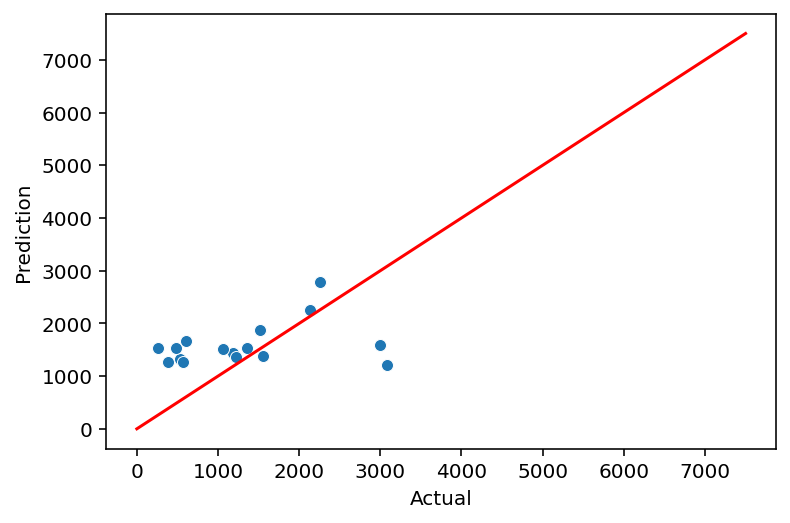

In [30]:
# plot predictions against actual

plot_k = sns.scatterplot(y_test,predictions)
plot_k.set(xlabel='Actual', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,7500,10000)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.show()

# Simulate linear line

## Prediction

In [31]:
X_test.loc[[20]]

KeyError: "None of [Int64Index([20], dtype='int64')] are in the [index]"

In [35]:
# Choose one of sample to predict and see result

# input : X_test.loc[[random sample for prediction test]]

y_pred = rfe.predict(X_test.loc[[20]])

plt.scatter(y_test.loc[[20]],  y_pred)
print( "Actual Patient",float(y_test.loc[[20]] ) )
print( "Predicted Patient", float( y_pred))

KeyError: "None of [Int64Index([10], dtype='int64')] are in the [index]"

**Residual Histogram**

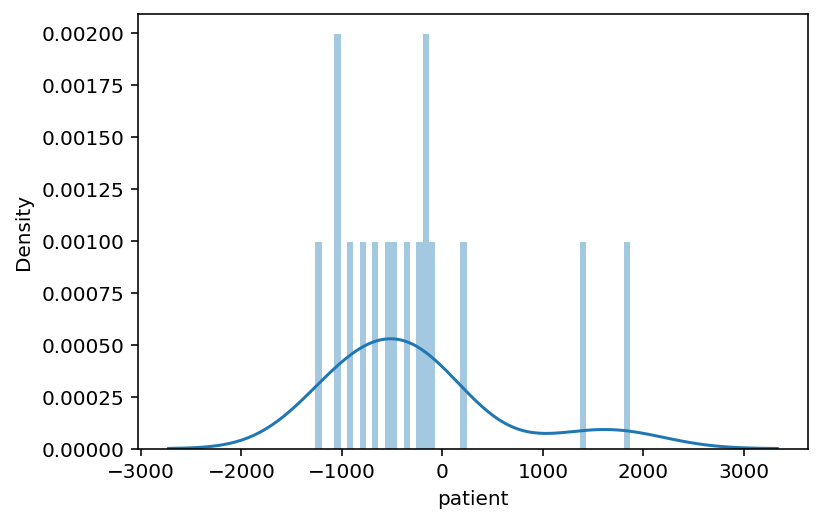

In [36]:
sns.distplot((y_test-predictions),bins=50);

### Actual value and the predicted value

In [37]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
mlr_diff.head(10)

,Actual value,Predicted value
16,2134,2247.751946
29,1353,1529.045734
60,1518,1879.036926
33,382,1274.603644
58,2990,1591.782369
47,264,1526.835094
25,530,1322.304443
70,1557,1377.283154
36,1183,1432.016929
71,1062,1519.936311


## Regression Evaluation Metrics


Evaluation metrics for regression problems as below:

**Coefficient of determination(R2 score)** is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

$$R2= 1- SSres  /  SStot$$

**Mean Absolute Error** (MAE): the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE): the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparison:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [38]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('R squared of Training Set: {:.2f}'.format(rfe.score(X_train,y_train)))
print('R squared of Test Set: {:.2f}'.format(rfe.score(X_test,y_test)))
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

R squared of Training Set: 0.05
R squared of Test Set: 0.00
Mean Absolute Error (MAE): 701.6551
Root Mean Squared Error (RMSE): 864.3461
